# <ins>K-Means Clustering</ins>

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

To process the learning data, the K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.

It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.

#####     

<img src = 'extras/kmeans3.gif' />

Let's observe how to implement this algorithm.

We will use a simple Customer Segmentation dataset. 

Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base.

This dataset is retrieved from kaggle and you can download it from [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

### Importing basic libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#### Let's load our data

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The 'Spending Score (1-100)' column is simply a score assigned by the mall based on customer behavior and spending nature.

Let's just rename the column for simplicity.

In [3]:
data = data.rename(columns = {'Spending Score (1-100)':'Score'})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### In this case we will only use the 'Age' and 'Score' column.

##### Basically we want to cluster our Customers based on their age and score.

#### Original data in a scatter plot:

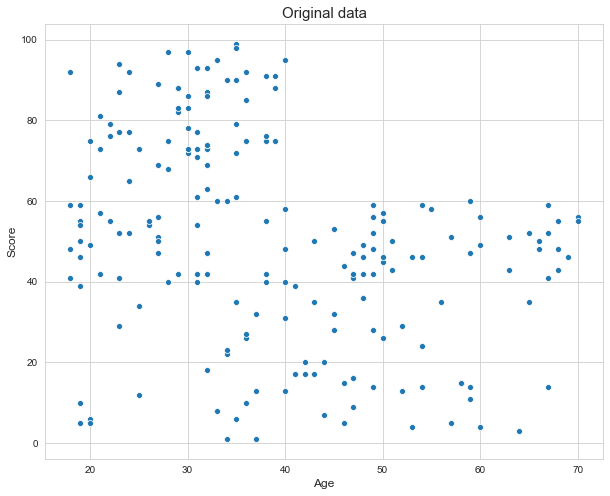

In [4]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = data, x = 'Age', y = 'Score')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.title('Original data', fontsize = 15)
plt.show()

We can see that there are a lot of customers who have a high score and some have a low score.

We need to divide these customers into several groups to be targeted for business needs. The main purpose is to understand the customers like who can be easily converged (Target Customers), so that the sense can be given to marketing team and plan the strategy accordingly.

##### Let's create another dataframe where only those two columns will be present.

In [5]:
cols = ['Age', 'Score']
customers = data[cols]
customers.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


## Implementing a simple K-Means Clustering algorithm

We will use the cluster module from sklearn package.

At first we will try to create 2 clusters and see the result.

In [6]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2) #n_clusters = value of k = number of clusters 

kmean.fit(customers)

KMeans(n_clusters=2)

In [7]:
# Assigning the cluster values

clusters = kmean.fit_predict(customers)
clusters

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

Now , let's merge these cluster values with our customers dataset.

In [8]:
#Copying the customers dataset
customers_clusters = customers.copy()

#Merging the cluster values by creating a new column
customers_clusters['Clusters'] = clusters

customers_clusters.head()

,Age,Score,Clusters
0,19,39,1
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,1


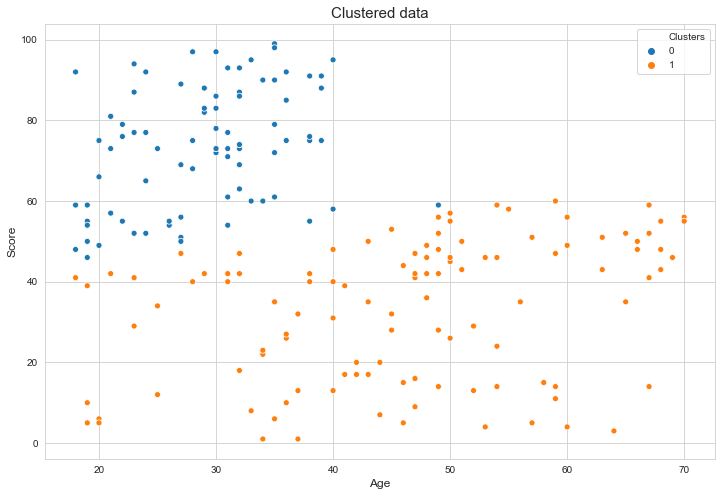

In [9]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = customers_clusters, x = 'Age', y = 'Score', hue = 'Clusters')# hue is used for sperating data points 
                                                                                    # using cluster values
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.title('Clustered data', fontsize = 15)
plt.show()

#### Here , the data is divided into two clusters. 

Choosing an arbitary value for the number of clusters is not a fessible option. We need to understand what is the optimal number of clusters for a specific data.

For this, we can use the WCSS method (also known as the Elbow method). WCSS means Within Clusters Sum of Squares.

**The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.**

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [10]:
kmean.inertia_

75949.15601023012

We got an inertia value of almost 76000. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

In [11]:
wcss = []
# 'cl_num' keeps track of the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 8
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(customers)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

#### Now, let's plot the elbow curve and find out the optimal number of clusters. The optimal number can be understood when the curve almost flattens out and doesn't decrease anymore

[]

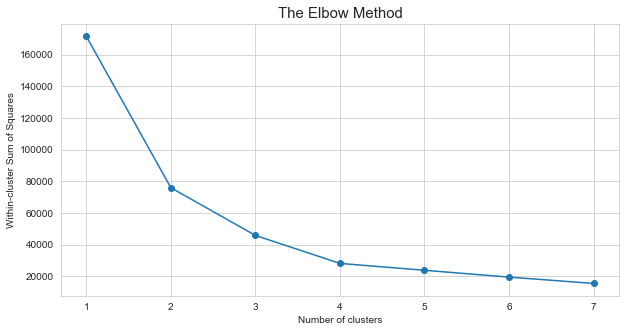

In [12]:
number_clusters = range(1,cl_num)

plt.figure(figsize = (10,5))
plt.plot(number_clusters, wcss, marker='o')
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.plot()

#### Here we can see that the curve almost flattens out after 4 clusters. The rate of decrease is very low at this stage. 

Hence, four clusters is our optimal number of clusters for this dataset.

Let's fit the model again with n_clusters = 4.

In [13]:
kmean = KMeans(n_clusters = 4)
kmean.fit(customers)

KMeans(n_clusters=4)

In [14]:
clusters = kmean.fit_predict(customers)

#Copying the customers dataset
customers_clusters = customers.copy()

#Merging the cluster values by creating a new column
customers_clusters['Clusters'] = clusters

customers_clusters.head()

,Age,Score,Clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


The new clusters have been assigned. Let's plot them in a scatter plot.

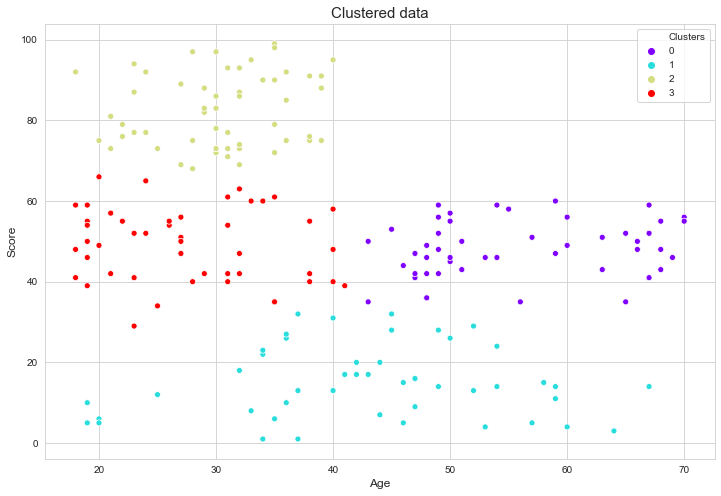

In [27]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = customers_clusters, x = 'Age', y = 'Score', hue = 'Clusters', palette= 'rainbow')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.title('Clustered data', fontsize = 15)
plt.show()

**The four clusters of customers have been clearly distinguished.**

These customers can be grouped as such:

- Low Age, Low Score
- High Age, High Score
- Low Age, Average Score
- High Age, Average Score

Based on these insights, the company will be able plan some business strategies and hence find their targeted customers.